### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt  
import numpy as np
from datetime import datetime

### Reading the Dataset

In [2]:
#code to load the dataset
dataset = pd.read_csv("cleaneddata.csv")
df = dataset

In [3]:
#displays first 5 rows of the dataset
dataset.head()

,Date Created,Solar Voltage,Solar Current,Battery Voltage,Inverter Charge Current,Usage Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date Extended,Unnamed: 11,Unnamed: 12
0,04/01/2022 12:08,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,NaN,NaN
1,04/01/2022 12:08,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,NaN,NaN
2,04/01/2022 12:08,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,NaN,NaN
3,04/01/2022 12:09,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,NaN,NaN
4,04/01/2022 12:09,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,NaN,NaN


### Cleaning Dataset Before Using It For Modelling

In [4]:
# To get the list of columns and their data types  
df.dtypes

Date Created                 object
 Solar Voltage              float64
 Solar Current              float64
 Battery Voltage            float64
 Inverter Charge Current      int64
 Usage Current              float64
 Solar Harvest              float64
 Battery Charge              object
 Inverter Charge            float64
 Usage Charge                object
 Date Extended               object
Unnamed: 11                 float64
Unnamed: 12                 float64
dtype: object

In [5]:
# Describes the dataset based on statistical indices
df.describe()

,Solar Voltage,Solar Current,Battery Voltage,Inverter Charge Current,Usage Current,Solar Harvest,Inverter Charge,Unnamed: 11,Unnamed: 12
count,702.000000,702.000000,702.000000,702.0,702.000000,702.000000,7.020000e+02,0.0,0.0
mean,13.828819,0.948759,12.331107,0.0,-4.721148,22.225146,6.758632e+17,NaN,NaN
std,0.439597,0.611725,0.454373,0.0,2.099007,22.162818,3.595264e+17,NaN,NaN
min,13.227050,0.085217,10.415717,0.0,-7.542828,3.389207,2.400000e+17,NaN,NaN
25%,13.593538,0.528412,12.094746,0.0,-6.140796,4.063559,2.400000e+17,NaN,NaN
50%,13.661722,0.732964,12.162930,0.0,-5.633678,20.331717,9.720000e+17,NaN,NaN
75%,13.983465,1.404149,12.495326,0.0,-3.426225,29.218991,9.720000e+17,NaN,NaN
max,16.346462,2.573929,14.881763,0.0,-0.801145,69.312950,9.720000e+17,NaN,NaN


In [6]:
#Renaming the Columns to include an underscore instead of space

df.rename(columns={' Battery Voltage':'Battery_Voltage',' Solar Voltage':'Solar_Voltage',' Solar Current':'Solar_Current', 'Date Created':'Date_Created',' Usage Current':'Usage_Current','Unnamed: 11':'Battery_Current','Unnamed: 12':'Solar_Power' ,' Date Extended':'Date_Extended' }, inplace=True)
df.columns

Index(['Date_Created', 'Solar_Voltage', 'Solar_Current', 'Battery_Voltage',
       ' Inverter Charge Current', 'Usage_Current', ' Solar Harvest',
       ' Battery Charge', ' Inverter Charge', ' Usage Charge', 'Date_Extended',
       'Battery_Current', 'Solar_Power'],
      dtype='object')

In [7]:
# Creating new columns for caclulated parameters

df['Battery_Current']=  df['Solar_Current'] + (df['Usage_Current']/2)
df['Solar_Power'] = df['Solar_Voltage'] * df['Solar_Current']
df['load_Power'] = df['Battery_Voltage'] * df['Usage_Current']/2 * -1
df['Battery_Power'] = df['Battery_Voltage'] * df['Battery_Current'] * -1
df['Total_Dc_Power'] = df['Solar_Power'] + df['Battery_Power']
df['Efficiency'] = (df['load_Power']/df['Total_Dc_Power']) * 100

In [8]:
df.head()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
0,04/01/2022 12:08,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,-2.024215,13.853956,39.982170,27.484272,41.338227,96.719605
1,04/01/2022 12:08,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,-2.024215,14.751910,40.817837,27.501524,42.253434,96.602412
2,04/01/2022 12:08,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,-2.019953,15.171035,41.184689,27.495274,42.666309,96.527424
3,04/01/2022 12:09,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,-1.990123,17.562657,37.423988,23.713830,41.276487,90.666602
4,04/01/2022 12:09,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,-2.821114,4.093548,43.101219,39.410406,43.503954,99.074256


In [9]:
# Converting the Date Created column from an Object data type to DateTime
df['Date_Created'] = pd.to_datetime(df['Date_Created'])
df['Date_Created']
df.head()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
0,2022-04-01 12:08:00,15.050969,0.920469,13.577745,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,-2.024215,13.853956,39.982170,27.484272,41.338227,96.719605
1,2022-04-01 12:08:00,15.050969,0.980130,13.586268,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,-2.024215,14.751910,40.817837,27.501524,42.253434,96.602412
2,2022-04-01 12:08:00,15.085061,1.005699,13.611837,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,-2.019953,15.171035,41.184689,27.495274,42.666309,96.527424
3,2022-04-01 12:09:00,15.264044,1.150590,11.915763,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,-1.990123,17.562657,37.423988,23.713830,41.276487,90.666602
4,2022-04-01 12:09:00,15.494164,0.264199,13.969803,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,-2.821114,4.093548,43.101219,39.410406,43.503954,99.074256


In [10]:
#Select rows within a specific time in this case between 7:30am and 17:45

df[(df['Date_Created'] > '07:30:00') & (df['Date_Created'] < '17:40:00')]
df.tail()

,Date_Created,Solar_Voltage,Solar_Current,Battery_Voltage,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Battery_Current,Solar_Power,load_Power,Battery_Power,Total_Dc_Power,Efficiency
697,2022-04-12 16:46:00,13.908889,0.187492,12.452711,0,-1.031265,69.311394,-12.12796879,9.720000e+17,∞,,-0.328140,2.607812,6.421025,4.086236,6.694047,95.921416
698,2022-04-12 16:46:00,13.908889,0.187492,12.452711,0,-1.031265,69.311394,-12.12796879,9.720000e+17,∞,,-0.328140,2.607812,6.421025,4.086236,6.694047,95.921416
699,2022-04-12 16:46:00,13.917412,0.281245,12.452711,0,-1.022742,69.312218,-12.13144302,9.720000e+17,∞,,-0.230126,3.914207,6.367958,2.865691,6.779898,93.924095
700,2022-04-12 16:47:00,13.917412,0.281245,12.452711,0,-1.022742,69.312218,-12.13144302,9.720000e+17,∞,,-0.230126,3.914207,6.367958,2.865691,6.779898,93.924095
701,2022-04-12 16:47:00,13.917412,0.187492,12.452711,0,-1.022742,69.312950,-12.13470554,9.720000e+17,∞,,-0.323879,2.609410,6.367958,4.033169,6.642578,95.865757


In [11]:
# Change order of columns 

df=df[['Date_Created',' Inverter Charge Current', 'Usage_Current', ' Solar Harvest',' Battery Charge', ' Inverter Charge', ' Usage Charge', 'Date_Extended','Solar_Voltage', 'Solar_Current', 'Battery_Voltage','Battery_Current', 'Total_Dc_Power','Solar_Power','load_Power','Battery_Power', 'Efficiency']]
df.head()

,Date_Created,Inverter Charge Current,Usage_Current,Solar Harvest,Battery Charge,Inverter Charge,Usage Charge,Date_Extended,Solar_Voltage,Solar_Current,Battery_Voltage,Battery_Current,Total_Dc_Power,Solar_Power,load_Power,Battery_Power,Efficiency
0,2022-04-01 12:08:00,0,-5.889368,15.189676,-∞,2.400000e+17,∞,,15.050969,0.920469,13.577745,-2.024215,41.338227,13.853956,39.982170,27.484272,96.719605
1,2022-04-01 12:08:00,0,-6.008690,15.193615,-∞,2.400000e+17,∞,,15.050969,0.980130,13.586268,-2.024215,42.253434,14.751910,40.817837,27.501524,96.602412
2,2022-04-01 12:08:00,0,-6.051305,15.197501,-∞,2.400000e+17,∞,,15.085061,1.005699,13.611837,-2.019953,42.666309,15.171035,41.184689,27.495274,96.527424
3,2022-04-01 12:09:00,0,-6.281425,15.202242,-∞,2.400000e+17,∞,,15.264044,1.150590,11.915763,-1.990123,41.276487,17.562657,37.423988,23.713830,90.666602
4,2022-04-01 12:09:00,0,-6.170627,15.207151,-∞,2.400000e+17,∞,,15.494164,0.264199,13.969803,-2.821114,43.503954,4.093548,43.101219,39.410406,99.074256


In [12]:
# trim the dataset to contain only the parameters that are going in the input layer of the model
model_data = df.iloc[:,13:17]
# exports the content of train to a csv file
model_data.to_csv(r'modeldata.csv', index=False)
model_data

,Solar_Power,load_Power,Battery_Power,Efficiency
0,13.853956,39.982170,27.484272,96.719605
1,14.751910,40.817837,27.501524,96.602412
2,15.171035,41.184689,27.495274,96.527424
3,17.562657,37.423988,23.713830,90.666602
4,4.093548,43.101219,39.410406,99.074256
...,...,...,...,...
697,2.607812,6.421025,4.086236,95.921416
698,2.607812,6.421025,4.086236,95.921416
699,3.914207,6.367958,2.865691,93.924095
700,3.914207,6.367958,2.865691,93.924095


### Creating The Network

In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

In [14]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [132]:
input_data = Input(shape=(3), name='Input')
dense1 = Dense(256, activation=tf.nn.relu)(input_data)
dense2 = Dense(256, activation=tf.nn.relu)(dense1)
output = Dense(1, name='output')(dense2)

model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'] )
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 256)               1024      
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
Total params: 67,073
Trainable params: 67,073
Non-trainable params: 0
_________________________________________________________________


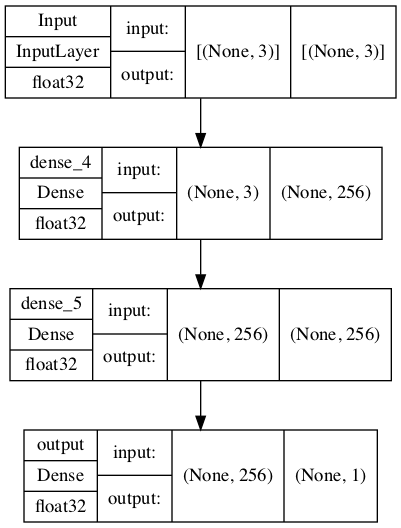

In [133]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

### Data Normalization

In [17]:
def separate(df):
    return df[['Efficiency']].to_numpy(), df.drop(df[['Efficiency']], axis=1).to_numpy()

In [134]:
min_max_scaler = preprocessing.MinMaxScaler()
df_normed = pd.DataFrame(min_max_scaler.fit_transform(model_data))
df_normed.columns = list(model_data.columns)
train_set, test_set = train_test_split(model_data)
train_labels, train_features = separate(train_set)
test_labels, test_features = separate(test_set)

### Fitting/Training the Network

In [135]:
history = model.fit(
    train_features,
    train_labels,
    epochs=1000,
    validation_data=(test_features,
                     test_labels)
)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 4520.2588 - mae: 62.2383 - mse: 4520.2588 - val_loss: 1432.8132 - val_mae: 26.1462 - val_mse: 1432.8132
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 1553.7874 - mae: 31.9791 - mse: 1553.7874 - val_loss: 1411.1367 - val_mae: 26.9323 - val_mse: 1411.1367
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1376.7574 - mae: 25.6655 - mse: 1376.7574 - val_loss: 1399.8456 - val_mae: 26.1721 - val_mse: 1399.8456
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 1345.1538 - mae: 25.9919 - mse: 1345.1538 - val_loss: 1379.8580 - val_mae: 26.2407 - val_mse: 1379.8580
Epoch 5/1000
17/17 [==============================] - 0s 10ms/step - loss: 1325.5918 - mae: 25.7389 - mse: 1325.5918 - val_loss: 1363.8126 - val_mae: 25.9897 - val_mse: 1363.8126
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 1312.1620 - mae: 25.4011 - mse: 13

Epoch 49/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7899 - mae: 0.6201 - mse: 0.7899 - val_loss: 2.7322 - val_mae: 1.2791 - val_mse: 2.7322
Epoch 50/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8739 - mae: 0.7200 - mse: 0.8739 - val_loss: 2.2803 - val_mae: 1.0560 - val_mse: 2.2803
Epoch 51/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8345 - mae: 0.6760 - mse: 0.8345 - val_loss: 1.9564 - val_mae: 0.9267 - val_mse: 1.9564
Epoch 52/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7842 - mae: 0.6479 - mse: 0.7842 - val_loss: 1.8225 - val_mae: 0.7999 - val_mse: 1.8225
Epoch 53/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7409 - mae: 0.6157 - mse: 0.7409 - val_loss: 2.1397 - val_mae: 1.0449 - val_mse: 2.1397
Epoch 54/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7535 - mae: 0.6618 - mse: 0.7535 - val_loss: 1.8375 - val_mae: 0.8101 - val_mse: 1.8375
Epoch 55/1

Epoch 99/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2359 - mae: 0.3520 - mse: 0.2359 - val_loss: 2.0361 - val_mae: 1.0610 - val_mse: 2.0361
Epoch 100/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.3045 - mae: 0.3906 - mse: 0.3045 - val_loss: 1.0430 - val_mae: 0.4099 - val_mse: 1.0430
Epoch 101/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2110 - mae: 0.3171 - mse: 0.2110 - val_loss: 1.0233 - val_mae: 0.4311 - val_mse: 1.0233
Epoch 102/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.6558 - mae: 0.6595 - mse: 0.6558 - val_loss: 1.1143 - val_mae: 0.5009 - val_mse: 1.1143
Epoch 103/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1785 - mae: 0.2883 - mse: 0.1785 - val_loss: 0.9943 - val_mae: 0.4238 - val_mse: 0.9943
Epoch 104/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1545 - mae: 0.2630 - mse: 0.1545 - val_loss: 1.0030 - val_mae: 0.3819 - val_mse: 1.0030
Epoch

17/17 [==============================] - 0s 6ms/step - loss: 0.1042 - mae: 0.2524 - mse: 0.1042 - val_loss: 0.8252 - val_mae: 0.3994 - val_mse: 0.8252
Epoch 198/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1495 - mae: 0.3120 - mse: 0.1495 - val_loss: 2.0783 - val_mae: 1.1632 - val_mse: 2.0783
Epoch 199/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7146 - mae: 0.6731 - mse: 0.7146 - val_loss: 0.8915 - val_mae: 0.4440 - val_mse: 0.8915
Epoch 200/1000
17/17 [==============================] - 0s 13ms/step - loss: 0.2085 - mae: 0.3512 - mse: 0.2085 - val_loss: 0.7492 - val_mae: 0.3340 - val_mse: 0.7492
Epoch 201/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1663 - mae: 0.3236 - mse: 0.1663 - val_loss: 0.7593 - val_mae: 0.2793 - val_mse: 0.7593
Epoch 202/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.0648 - mae: 0.1933 - mse: 0.0648 - val_loss: 0.8038 - val_mae: 0.4017 - val_mse: 0.8038
Epoch 203/1000
17/

17/17 [==============================] - 0s 3ms/step - loss: 0.0238 - mae: 0.1165 - mse: 0.0238 - val_loss: 0.7272 - val_mae: 0.2378 - val_mse: 0.7272
Epoch 296/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0408 - mae: 0.1674 - mse: 0.0408 - val_loss: 0.7146 - val_mae: 0.2603 - val_mse: 0.7146
Epoch 297/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1496 - mae: 0.3185 - mse: 0.1496 - val_loss: 0.8281 - val_mae: 0.5215 - val_mse: 0.8281
Epoch 298/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.2792 - mae: 0.4468 - mse: 0.2792 - val_loss: 0.9054 - val_mae: 0.5449 - val_mse: 0.9054
Epoch 299/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1022 - mae: 0.2606 - mse: 0.1022 - val_loss: 0.7149 - val_mae: 0.2256 - val_mse: 0.7149
Epoch 300/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0567 - mae: 0.1832 - mse: 0.0567 - val_loss: 0.6927 - val_mae: 0.2545 - val_mse: 0.6927
Epoch 301/1000
17/1

17/17 [==============================] - 0s 5ms/step - loss: 0.0762 - mae: 0.2271 - mse: 0.0762 - val_loss: 0.7032 - val_mae: 0.3031 - val_mse: 0.7032
Epoch 394/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0830 - mae: 0.2358 - mse: 0.0830 - val_loss: 0.9672 - val_mae: 0.5856 - val_mse: 0.9672
Epoch 395/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.1058 - mae: 0.2602 - mse: 0.1058 - val_loss: 0.7139 - val_mae: 0.2270 - val_mse: 0.7139
Epoch 396/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0218 - mae: 0.1092 - mse: 0.0218 - val_loss: 0.6836 - val_mae: 0.2106 - val_mse: 0.6836
Epoch 397/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0859 - mae: 0.2281 - mse: 0.0859 - val_loss: 0.9017 - val_mae: 0.5344 - val_mse: 0.9017
Epoch 398/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0929 - mae: 0.2552 - mse: 0.0929 - val_loss: 0.8575 - val_mae: 0.4875 - val_mse: 0.8575
Epoch 399/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0848 - mae: 0.2129 - mse: 0.0848 - val_loss: 0.7881 - val_mae: 0.4130 - val_mse: 0.7881
Epoch 492/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1501 - mae: 0.3195 - mse: 0.1501 - val_loss: 1.0159 - val_mae: 0.6381 - val_mse: 1.0159
Epoch 493/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.5206 - mae: 0.5994 - mse: 0.5206 - val_loss: 0.9858 - val_mae: 0.6084 - val_mse: 0.9858
Epoch 494/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.6753 - mae: 0.6470 - mse: 0.6753 - val_loss: 1.0671 - val_mae: 0.6755 - val_mse: 1.0671
Epoch 495/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1209 - mae: 0.2667 - mse: 0.1209 - val_loss: 0.9257 - val_mae: 0.5696 - val_mse: 0.9257
Epoch 496/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.2769 - mae: 0.4344 - mse: 0.2769 - val_loss: 1.2122 - val_mae: 0.7745 - val_mse: 1.2122
Epoch 497/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.0984 - mae: 0.2479 - mse: 0.0984 - val_loss: 0.6770 - val_mae: 0.3031 - val_mse: 0.6770
Epoch 590/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1102 - mae: 0.2614 - mse: 0.1102 - val_loss: 0.7368 - val_mae: 0.3570 - val_mse: 0.7368
Epoch 591/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.1407 - mae: 0.2956 - mse: 0.1407 - val_loss: 0.6340 - val_mae: 0.2097 - val_mse: 0.6340
Epoch 592/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1403 - mae: 0.2910 - mse: 0.1403 - val_loss: 0.7248 - val_mae: 0.3903 - val_mse: 0.7248
Epoch 593/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.1109 - mae: 0.2704 - mse: 0.1109 - val_loss: 0.6393 - val_mae: 0.2756 - val_mse: 0.6393
Epoch 594/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.1458 - mae: 0.3113 - mse: 0.1458 - val_loss: 1.0185 - val_mae: 0.6274 - val_mse: 1.0185
Epoch 595/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0426 - mae: 0.1646 - mse: 0.0426 - val_loss: 0.7528 - val_mae: 0.4065 - val_mse: 0.7528
Epoch 688/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0275 - mae: 0.1305 - mse: 0.0275 - val_loss: 0.8876 - val_mae: 0.5470 - val_mse: 0.8876
Epoch 689/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0590 - mae: 0.1886 - mse: 0.0590 - val_loss: 0.6479 - val_mae: 0.2151 - val_mse: 0.6479
Epoch 690/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0227 - mae: 0.1175 - mse: 0.0227 - val_loss: 0.6539 - val_mae: 0.2102 - val_mse: 0.6539
Epoch 691/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0287 - mae: 0.1324 - mse: 0.0287 - val_loss: 0.6492 - val_mae: 0.2068 - val_mse: 0.6492
Epoch 692/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1120 - mae: 0.2669 - mse: 0.1120 - val_loss: 0.6664 - val_mae: 0.3150 - val_mse: 0.6664
Epoch 693/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0992 - mae: 0.2329 - mse: 0.0992 - val_loss: 0.6880 - val_mae: 0.3328 - val_mse: 0.6880
Epoch 786/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0240 - mae: 0.1186 - mse: 0.0240 - val_loss: 0.6899 - val_mae: 0.3670 - val_mse: 0.6899
Epoch 787/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1071 - mae: 0.2669 - mse: 0.1071 - val_loss: 1.4298 - val_mae: 0.9153 - val_mse: 1.4298
Epoch 788/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.2595 - mae: 0.4037 - mse: 0.2595 - val_loss: 0.6876 - val_mae: 0.3867 - val_mse: 0.6876
Epoch 789/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0523 - mae: 0.1870 - mse: 0.0523 - val_loss: 0.6612 - val_mae: 0.3337 - val_mse: 0.6612
Epoch 790/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0435 - mae: 0.1699 - mse: 0.0435 - val_loss: 0.6974 - val_mae: 0.3636 - val_mse: 0.6974
Epoch 791/1000
17/1

17/17 [==============================] - 0s 3ms/step - loss: 0.0694 - mae: 0.2037 - mse: 0.0694 - val_loss: 0.7515 - val_mae: 0.3705 - val_mse: 0.7515
Epoch 884/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0446 - mae: 0.1682 - mse: 0.0446 - val_loss: 0.6559 - val_mae: 0.2066 - val_mse: 0.6559
Epoch 885/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1864 - mae: 0.3525 - mse: 0.1864 - val_loss: 0.8812 - val_mae: 0.5305 - val_mse: 0.8812
Epoch 886/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.2858 - mae: 0.4214 - mse: 0.2858 - val_loss: 0.7223 - val_mae: 0.3400 - val_mse: 0.7223
Epoch 887/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0714 - mae: 0.2081 - mse: 0.0714 - val_loss: 0.6476 - val_mae: 0.2665 - val_mse: 0.6476
Epoch 888/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0725 - mae: 0.2226 - mse: 0.0725 - val_loss: 0.6845 - val_mae: 0.2953 - val_mse: 0.6845
Epoch 889/1000
17/1

17/17 [==============================] - 0s 4ms/step - loss: 0.5495 - mae: 0.6032 - mse: 0.5495 - val_loss: 1.0966 - val_mae: 0.6492 - val_mse: 1.0966
Epoch 982/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.1140 - mae: 0.2560 - mse: 0.1140 - val_loss: 0.6348 - val_mae: 0.2402 - val_mse: 0.6348
Epoch 983/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.0538 - mae: 0.1884 - mse: 0.0538 - val_loss: 0.6589 - val_mae: 0.2862 - val_mse: 0.6589
Epoch 984/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.0294 - mae: 0.1326 - mse: 0.0294 - val_loss: 0.6431 - val_mae: 0.2347 - val_mse: 0.6431
Epoch 985/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.0170 - mae: 0.0988 - mse: 0.0170 - val_loss: 0.6465 - val_mae: 0.2487 - val_mse: 0.6465
Epoch 986/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0320 - mae: 0.1425 - mse: 0.0320 - val_loss: 0.6815 - val_mae: 0.2931 - val_mse: 0.6815
Epoch 987/1000
17/1

### Model Performance Evaluation

In [149]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import average_precision_score
from scipy.stats import pearsonr
for i in range(np.shape(train_labels)[1]): 
  metrics= {
      'mae-train': np.mean(np.abs(train_labels[:, i] - model.predict(train_features)[:, i])),
      'mse-train': np.mean(np.square(train_labels[:, i] - model.predict(train_features)[:, i])),
      'r2-train': r2_score(train_labels[:, i], model.predict(train_features)[:, i]),
      'pearson-train': pearsonr(train_labels[:, i], model.predict(train_features)[:, i])[0],
      'mae-test': np.mean(np.abs(test_labels[:, i] - model.predict(test_features)[:, i])),
      'mse-test': np.mean(np.square(test_labels[:, i] - model.predict(test_features)[:, i])),
      'r2-test': r2_score(test_labels[:, i] ,model.predict(test_features)[:, i]),
      'pearson-test': pearsonr(test_labels[:, i], model.predict(test_features)[:, i])[0]
  }

  blue = lambda x: '\033[94m' + x + '\033[0m'
  yellow = lambda x: '\033[93m' + x + '\033[0m'

  for key in metrics:
      if 'train' in key:
          print(f'Y{i} - {blue(key)} - {str(metrics[key])[:7]}')
      else:
          print(f'Y{i} - {yellow(key)} - {str(metrics[key])[:7]}')
metric = tf.keras.metrics.Accuracy()
metric.update_state(y_pred,test_labels)
metric.result().numpy()
            

Y0 - mae-train - 0.08976
Y0 - mse-train - 0.01220
Y0 - r2-train - 0.99760
Y0 - pearson-train - 0.99918
Y0 - mae-test - 0.20002
Y0 - mse-test - 0.62637
Y0 - r2-test - 0.90904
Y0 - pearson-test - 0.95818


0.0

In [136]:
from prettytable import PrettyTable
metrics_table =  PrettyTable(["MSE", "MAE", "pearson", "r2"])
metrics_table.add_row(["0.09718", "0.03199", "0.99399", "0.99731"])
metrics_table.add_row(["0.11152", "0.05918", "0.99044", "0.99602"])
print(metrics_table )

+---------+---------+---------+---------+
|   MSE   |   MAE   | pearson |    r2   |
+---------+---------+---------+---------+
| 0.09718 | 0.03199 | 0.99399 | 0.99731 |
| 0.11152 | 0.05918 | 0.99044 | 0.99602 |
+---------+---------+---------+---------+


### Data Visualisation

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

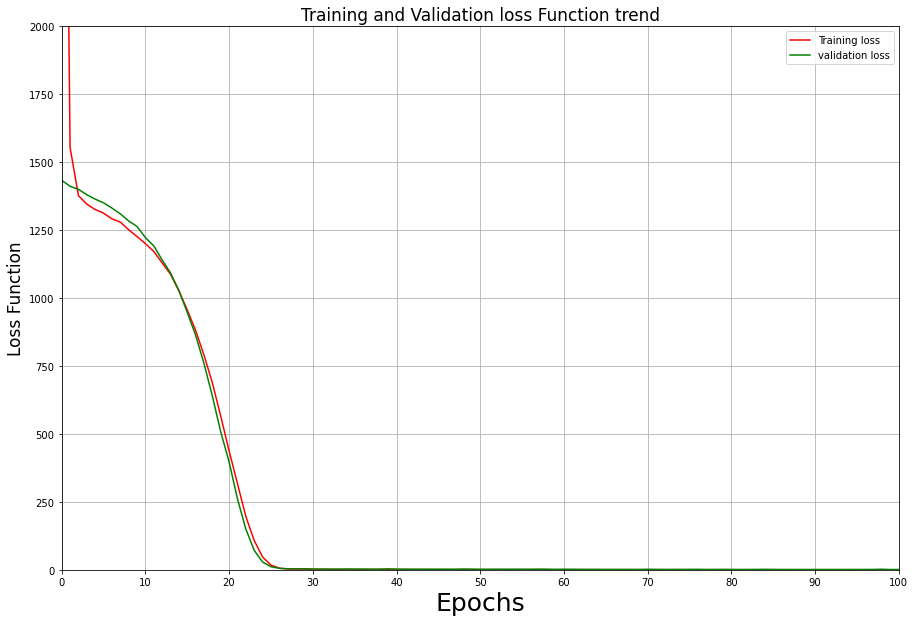

In [162]:
import matplotlib.ticker as ticker
loss = history.history['loss']
val_loss = history.history['val_loss']
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(loss ,'r', label='Training loss')
plt.plot(val_loss , 'g', label='validation loss')

plt.ylim([0, 2000])
plt.grid('both')
plt.xlabel('Epochs',fontsize=25)
plt.ylabel('Loss Function',fontsize=17)
plt.title('Training and Validation loss Function trend',fontsize=17)
plt.legend()
tick_spacing = 10
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlim([0, 100])
plt.show()
fig.savefig("Graphs/lossfunction.png")

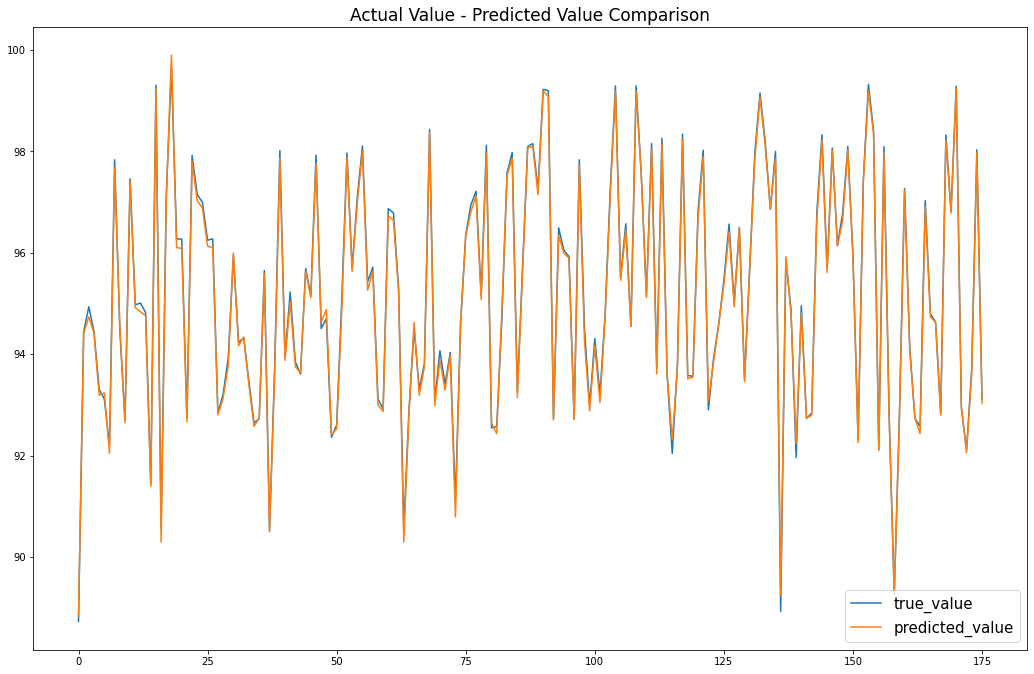

In [62]:
fig,ax = plt.subplots(figsize=(15,10))
true_value = (test_labels)
predicted_value = model.predict(test_features)
plt.plot(true_value)
plt.plot(predicted_value)
plt.legend(labels=['true_value','predicted_value'],loc='lower right',fontsize=15)
plt.title('Actual Value - Predicted Value Comparison',fontsize=17)
fig.tight_layout(pad=3.0)
fig.savefig("Graphs/predictioncomparison.png")

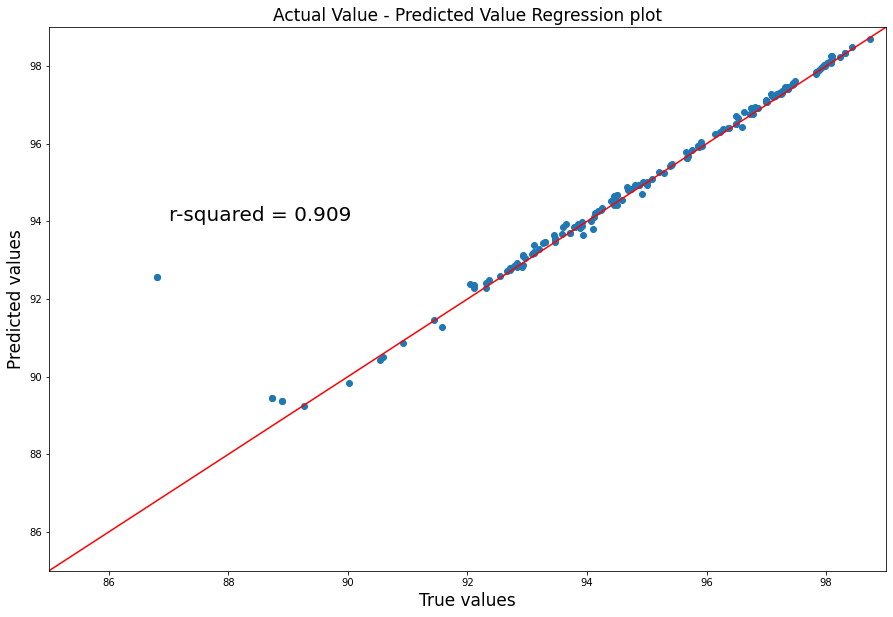

In [139]:
y_pred = model.predict(test_features).flatten()
fig,ax = plt.subplots(figsize=(15,10))
ax.text(87,94, "r-squared = {:.3f}".format(r2_score(test_labels ,y_pred)), fontsize=20)
plt.scatter(test_labels ,y_pred)
plt.xlabel('True values', fontsize=17)
plt.ylabel('Predicted values', fontsize=17)
plt.title('Actual Value - Predicted Value Regression plot' ,fontsize=17)
plt.xlim([85, 99])
plt.ylim([85, 99])
plt.plot([85, 99], [85, 99],'red')
plt.show()
fig.savefig("Graphs/scatter.png")

